In [9]:
import random
import os

import torch
import numpy as np
import pandas as pd

## Lectura de datos

In [10]:
# Lectura de los datos procesados
path_data = os.path.abspath('data/spcc/supervised/charnock_preprocessed/unblind_hostz.csv')
num_augments = 5

# 0: supernovas tipo Ia
# 1: supernovas tipo NonIa
sn1a_classifier = {1:0, 2:1, 3:1, 21:1, 22: 1, 23:1, 32: 1, 33:1}

spcc_charnock_lc = pd.read_csv(path_data, header=None, sep=",")
spcc_charnock_lc.columns = ['oid', 'mjd', 'ra', 'decl', 'mwebv', 'photo_z', 'g_flux', 'r_flux', 'i_flux', 'z_flux', 'g_error', 'r_error', 'i_error', 'z_error', 'sim_redshift', 'class']

print(f"Cantidad de observaciones en un unblind_nohostz_1: {len(spcc_charnock_lc)}")
print(f"Cantidad de supernovas: {len(set(spcc_charnock_lc.oid))}")

Cantidad de observaciones en un unblind_nohostz_1: 757889
Cantidad de supernovas: 21319


In [11]:
# Reemplaza las multiclases en clases binarias
spcc_charnock_lc['class'] = spcc_charnock_lc['class'].replace(sn1a_classifier)
print(f"Classes: {set(spcc_charnock_lc['class'])}")
spcc_charnock_lc

Classes: {0, 1}


,oid,mjd,ra,decl,mwebv,photo_z,g_flux,r_flux,i_flux,z_flux,g_error,r_error,i_error,z_error,sim_redshift,class
0,17,0.00000,0.5,-43.0,0.0111,0.3502,-36.790000,4.410000,0.644700,1.337000,78.090000,17.580000,49.950000,3.581000,0.3972,1
1,17,0.99400,0.5,-43.0,0.0111,0.3502,-22.489620,4.410000,0.644700,1.337000,64.353404,17.580000,49.950000,3.581000,0.3972,1
2,17,5.10900,0.5,-43.0,0.0111,0.3502,0.445187,-1.687481,7.491816,1.337000,37.499395,15.374710,35.623627,3.581000,0.3972,1
3,17,7.98975,0.5,-43.0,0.0111,0.3502,6.122000,-3.697000,14.390000,5.544000,6.377000,4.331000,7.145000,8.139000,0.3972,1
4,17,9.00350,0.5,-43.0,0.0111,0.3502,2.865000,1.002000,10.950000,-1.652000,5.671000,4.492000,6.740000,10.160000,0.3972,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757884,899894,150.75550,52.5,-27.5,0.0097,0.9692,0.488800,12.010000,13.020000,25.220000,2.752000,1.669000,2.735000,3.020000,0.9867,1
757885,899894,158.75050,52.5,-27.5,0.0097,0.9692,1.944000,14.500000,13.149568,24.090304,3.252000,2.120000,2.497605,2.797552,0.9867,1
757886,899894,159.70350,52.5,-27.5,0.0097,0.9692,1.774758,14.029896,16.320000,23.320000,3.630127,2.002723,2.378000,2.468000,0.9867,1
757887,899894,160.75450,52.5,-27.5,0.0097,0.9692,1.501000,12.830000,16.910000,21.320000,3.837000,1.835000,3.178000,4.877000,0.9867,1


In [13]:
spcc_charnock_lc[spcc_charnock_lc.oid == 17].to_excel('revision_data_pos.xlsx')

In [4]:
#name_col_id = spcc_charnock_lc.columns[0]
#name_col_label = spcc_charnock_lc.columns[-1]
#
#lc_split = LightCurvesSplit(name_col_id, name_col_label)
#lc_split.id_and_label_ligthcurves(spcc_charnock_lc)

## Separación datos de train y test

In [5]:
# Cantidad y las supernovas que quedaran para el entrenamiento y testeo
test_fraction = 0.5

ids_sne = spcc_charnock_lc.oid.unique()
ids_sne_length = len(ids_sne)
test_length = int(ids_sne_length * test_fraction)
indices = np.random.permutation(ids_sne_length) # Indices permutados de los datos de ids_sne_length

# Indice de los datos que se entrenaran y testearan
training_idx, test_idx = indices[:ids_sne_length-test_length], indices[ids_sne_length-test_length:]

# ids de supernovas para entrenar y testear
ids_train = ids_sne[training_idx]
ids_test = ids_sne[test_idx]

print(f'Cantidad de supernovas en el conjunto de entrenamiento: {len(ids_train)}')
print(f'Cantidad de supernovas en el conjunto de prueba: {len(ids_test)}')

Cantidad de supernovas en el conjunto de entrenamiento: 10660
Cantidad de supernovas en el conjunto de prueba: 10659


# ------------------------------------------------------------------

In [6]:
my_file_train = open("pytorch_training_1.txt", "r")
train_content = my_file_train.read()
train_content_list = train_content.split("\n")
my_file_train.close()

my_file_test = open("pytorch_test_1.txt", "r")
test_content = my_file_test.read()
test_content_list = test_content.split("\n")
my_file_test.close()

ids_train_aumented = [int(i) for i in train_content_list[0:-1]]
print(f"Datos de entrenamiento con aumentación: {len(ids_train_aumented)}")

ids_test_aumented = [int(i) for i in test_content_list[0:-1]]
print(f"Datos de test con aumentación: {len(ids_test_aumented)}")

ids_train = list(set(ids_train_aumented))
print(f"Datos de entrenamiento: {len(ids_train)}")

ids_test = list(set(ids_test_aumented))
print(f"Datos de test: {len(ids_test)}")

Datos de entrenamiento con aumentación: 10660
Datos de test con aumentación: 10659
Datos de entrenamiento: 10660
Datos de test: 10659


In [8]:
# Separa los datos
data, labels = [], []
training_idx = []
test_idx = []

idx = 0
for id in ids_sne:
    filter_sn = spcc_charnock_lc[spcc_charnock_lc.oid == id]
    data_sequence = filter_sn.iloc[0:, 1:-1:].values
    label = filter_sn.iloc[0,-1]

    # Genera copias exactas de la data original (aumentaciones de datos realizados en charnock)
    for augment in range(0, num_augments):
        labels.append(label)
        data.append(torch.tensor(data_sequence))

        # Indexa en que lugar de la data y labels se encuentran los datos de training y testing
        if id in ids_train:
            training_idx.append(idx)
        elif id in ids_test:
            test_idx.append(idx)

        idx += 1

In [9]:
# Desordena la consecutividad de las supernovas aumentadas
random.shuffle(training_idx)
random.shuffle(test_idx)

In [10]:
np.savetxt('pytorch_training_1.txt', ids_train, fmt='%s')
np.savetxt('pytorch_test_1.txt', ids_test, fmt='%s')

## Lectura de datos aumentados según los ids obtenidos para entrenamiento y test

In [12]:
##################### Labels #####################
# In tensor format
labels_torch = torch.tensor(labels)
nb_classes = labels_torch.unique().size(0)

##################### Train data #####################
X_train = []
for idx in training_idx:
    X_train.append(data[idx])
    
y_train = labels_torch[training_idx]
y_train_onehot = torch.nn.functional.one_hot(labels_torch[training_idx], nb_classes)

##################### Test data #####################
X_test = []
for idx in test_idx:
    X_test.append(data[idx])

y_test = labels_torch[test_idx]
y_test_onehot = torch.nn.functional.one_hot(labels_torch[test_idx], nb_classes)

# one_hot: [SNIa, NonSNIa]
print(f'Cantidad de SNs: {len(data)}')
print(f'Cantidad de supernovas para training: {len(X_train)}')
print(f'Cantidad de supernovas para test: {len(X_test)}')

Cantidad de SNs: 106595
Cantidad de supernovas para training: 53300
Cantidad de supernovas para test: 53295


## Data loader

In [13]:
import data_loaders

one_hot = False
data_loader = data_loaders.PhotometryDataLoaders(X_train, y_train, X_test, y_test, one_hot, batch_size=10, 
                                                num_workers=0, shuffle=False, collate_fn=data_loaders.collate_fn,
                                                weight_norm=True)

# features and number classes in the dataset
input_size = data_loader.train_set.dataset.data[0].size(1)
num_classes = data_loader.train_set.dataset.labels.unique().size(0)

Using cuda device


## Entrenamiento del modelo

### Parametros

In [14]:
import conf

CONFIG = conf.get_args(input_size, num_classes)
CONFIG

Namespace(seed=0, fold=0, num_augment=5, batch_size=10, loss_list=['crossentropy'], lr=0.001, optimizer='adam', rnn_type='LSTM', dropout=0.5, input_size=14, num_classes=2, hidden_size=16, num_layers=2, activation='tanh', batch_norm=False, type_train='normal', num_epochs=200, verbose=True, patience=200, metric_eval='accuracy', name_model='charnock', experiment='/exp_1_charnock_results/', load_file='save_results', save_file='save_results', load_model=False, model_path='/best_result/ckpt-181-0.9502.pt')

### Building model

In [15]:
import models.base_model

def model_type(CONFIG):
    
    if CONFIG.load_model:
        model = models.base_model.Model(CONFIG)
        model.summary()

    else:
        model = models.base_model.Model(CONFIG)
        model.summary()
        model.compile(CONFIG.loss_list, CONFIG.optimizer, CONFIG.lr, CONFIG.metric_eval)

    return model

Using cuda device


In [16]:
charnock_model = model_type(CONFIG)

CharnockModel(
  (lstm): LSTM(14, 16, num_layers=2, batch_first=True, dropout=0.5)
  (output_dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)


### Training model

In [17]:
charnock_model.fit(data_loader.train_set, data_loader.test_set, 'normal', CONFIG.num_epochs, CONFIG.verbose)


Epoch 1/200 - time: 82.170 seg
loss = 0.33682, val_loss = 0.24665, acc = 0.85409, val_acc = 0.88931, 
Saving model... accuracy improved from inf to 0.88931

Epoch 2/200 - time: 77.769 seg
loss = 0.23633, val_loss = 0.28009, acc = 0.90732, val_acc = 0.87795, 
INFO: Early stopping counter 1 of 200

Epoch 3/200 - time: 77.139 seg
loss = 0.20952, val_loss = 0.28371, acc = 0.91874, val_acc = 0.88452, 
INFO: Early stopping counter 2 of 200

Epoch 4/200 - time: 74.187 seg
loss = 0.19037, val_loss = 0.19592, acc = 0.92672, val_acc = 0.92158, 
Saving model... accuracy improved from 0.88931 to 0.92158

Epoch 5/200 - time: 75.560 seg
loss = 0.17820, val_loss = 0.22962, acc = 0.93386, val_acc = 0.90328, 
INFO: Early stopping counter 1 of 200

Epoch 6/200 - time: 69.308 seg
loss = 0.16836, val_loss = 0.22024, acc = 0.93640, val_acc = 0.92195, 
Saving model... accuracy improved from 0.92158 to 0.92195

Epoch 7/200 - time: 70.946 seg
loss = 0.16343, val_loss = 0.18268, acc = 0.93908, val_acc = 0.926

In [18]:
np.savetxt('pytorch_training_1.txt', ids_train, fmt='%s')
np.savetxt('pytorch_test_1.txt', ids_test, fmt='%s')

### Plot learning curves training

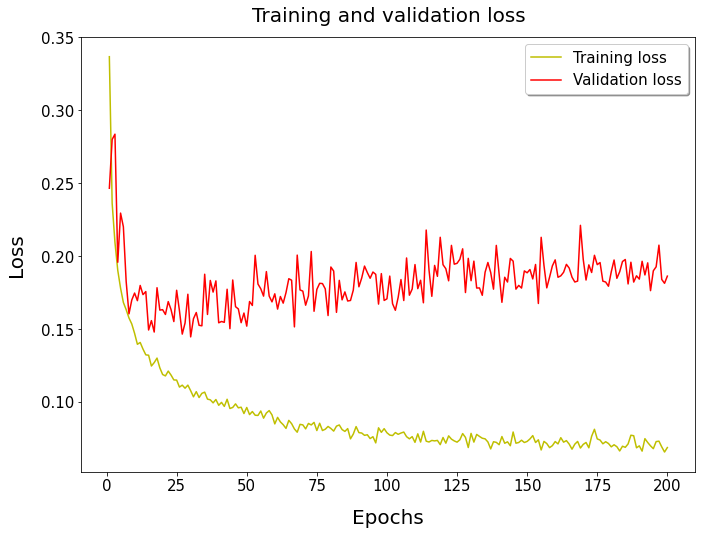

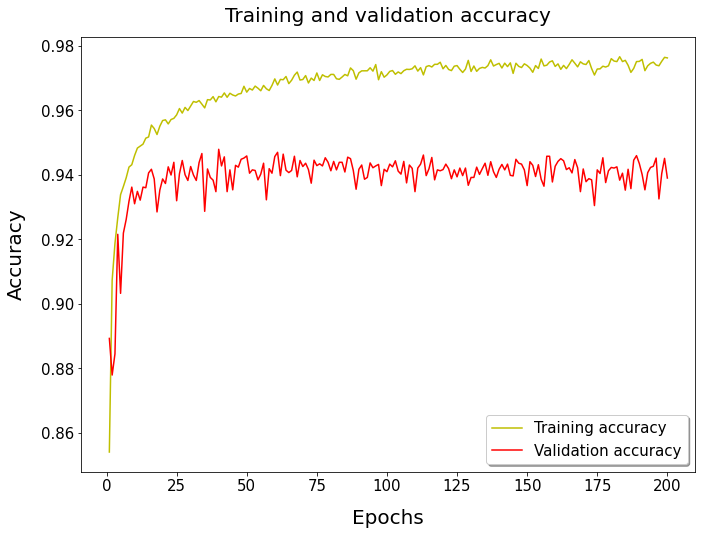

In [19]:
import utils.plots

# ----------------------------------------------------------------------------------------
metric = 'Loss'
labels_curves = ['Training', 'Validation']
color_curves = ['y', 'r']

train_loss = charnock_model.checkpoint.train_loss
val_loss = charnock_model.checkpoint.val_loss
utils.plots.plot_learning_curves(train_loss, val_loss, metric, labels_curves, color_curves)

# ----------------------------------------------------------------------------------------
metric = 'Accuracy'
labels_curves = ['Training', 'Validation']
color_curves = ['y', 'r']

train_acc = charnock_model.checkpoint.train_acc
val_acc = charnock_model.checkpoint.val_acc
utils.plots.plot_learning_curves(train_acc, val_acc, metric, labels_curves, color_curves, loc='lower right')

In [20]:
loss, acc = charnock_model.evaluate(data_loader.test_set, data_loader.test_set.batch_size)
y_pred_prob, y_pred = charnock_model.predict(data_loader.test_set, data_loader.test_set.batch_size)

### Metrics

In [21]:
import utils.metrics

dict_labels = {0: 'SNIa', 1: 'nonSNIa'}
utils.metrics.print_metrics(y_test, y_pred, y_pred_prob, loss, dict_labels, one_hot)

Loss: 0.18642102181911469
Accuracy: 0.93902
Accuracy balanced: 0.93975
AUC: 0.9839939576410854
macro precision:  0.90410
macro recall:  0.93975
macro F1:  0.91987

              precision    recall  f1-score   support

        SNIa      0.828     0.941     0.881     12745
     nonSNIa      0.981     0.938     0.959     40550

    accuracy                          0.939     53295
   macro avg      0.904     0.940     0.920     53295
weighted avg      0.944     0.939     0.940     53295



### Plot confusion matrix

Normalized confusion matrix


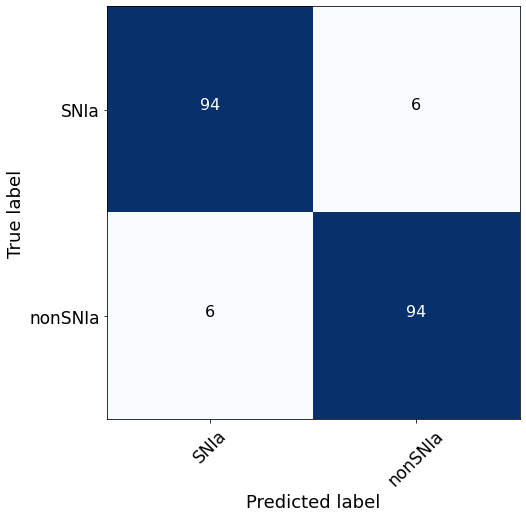

In [22]:
label_order = ['SNIa', 'nonSNIa']
figsize = (13, 7)
utils.plots.plot_cm(y_test, y_pred, label_order, dict_labels, figsize)

### Load model checkpoint

In [ ]:
charnock_model = model_type(CONFIG)

In [ ]:
loss, acc = charnock_model.evaluate(data_loader.test_set, data_loader.test_set.batch_size)
y_pred_prob, y_pred = charnock_model.predict(data_loader.test_set, data_loader.test_set.batch_size)

In [ ]:
import utils.metrics

dict_labels = {0: 'SNIa', 1: 'nonSNIa'}
utils.metrics.print_metrics(y_test, y_pred, y_pred_prob, loss, dict_labels, one_hot)

In [ ]:
label_order = ['SNIa', 'nonSNIa']
figsize = (13, 7)
utils.plots.plot_cm(y_test, y_pred, label_order, dict_labels, figsize)